In [30]:
import pandas as pd
import matplotlib
import seaborn as sns
import os

%matplotlib inline

In [35]:
df = pd.read_csv('../dataset/xeno_canto_bird_songs_cleaned.tsv', sep='\t')

In [36]:
df.columns.values

array(['gbifID', 'species', 'country'], dtype=object)

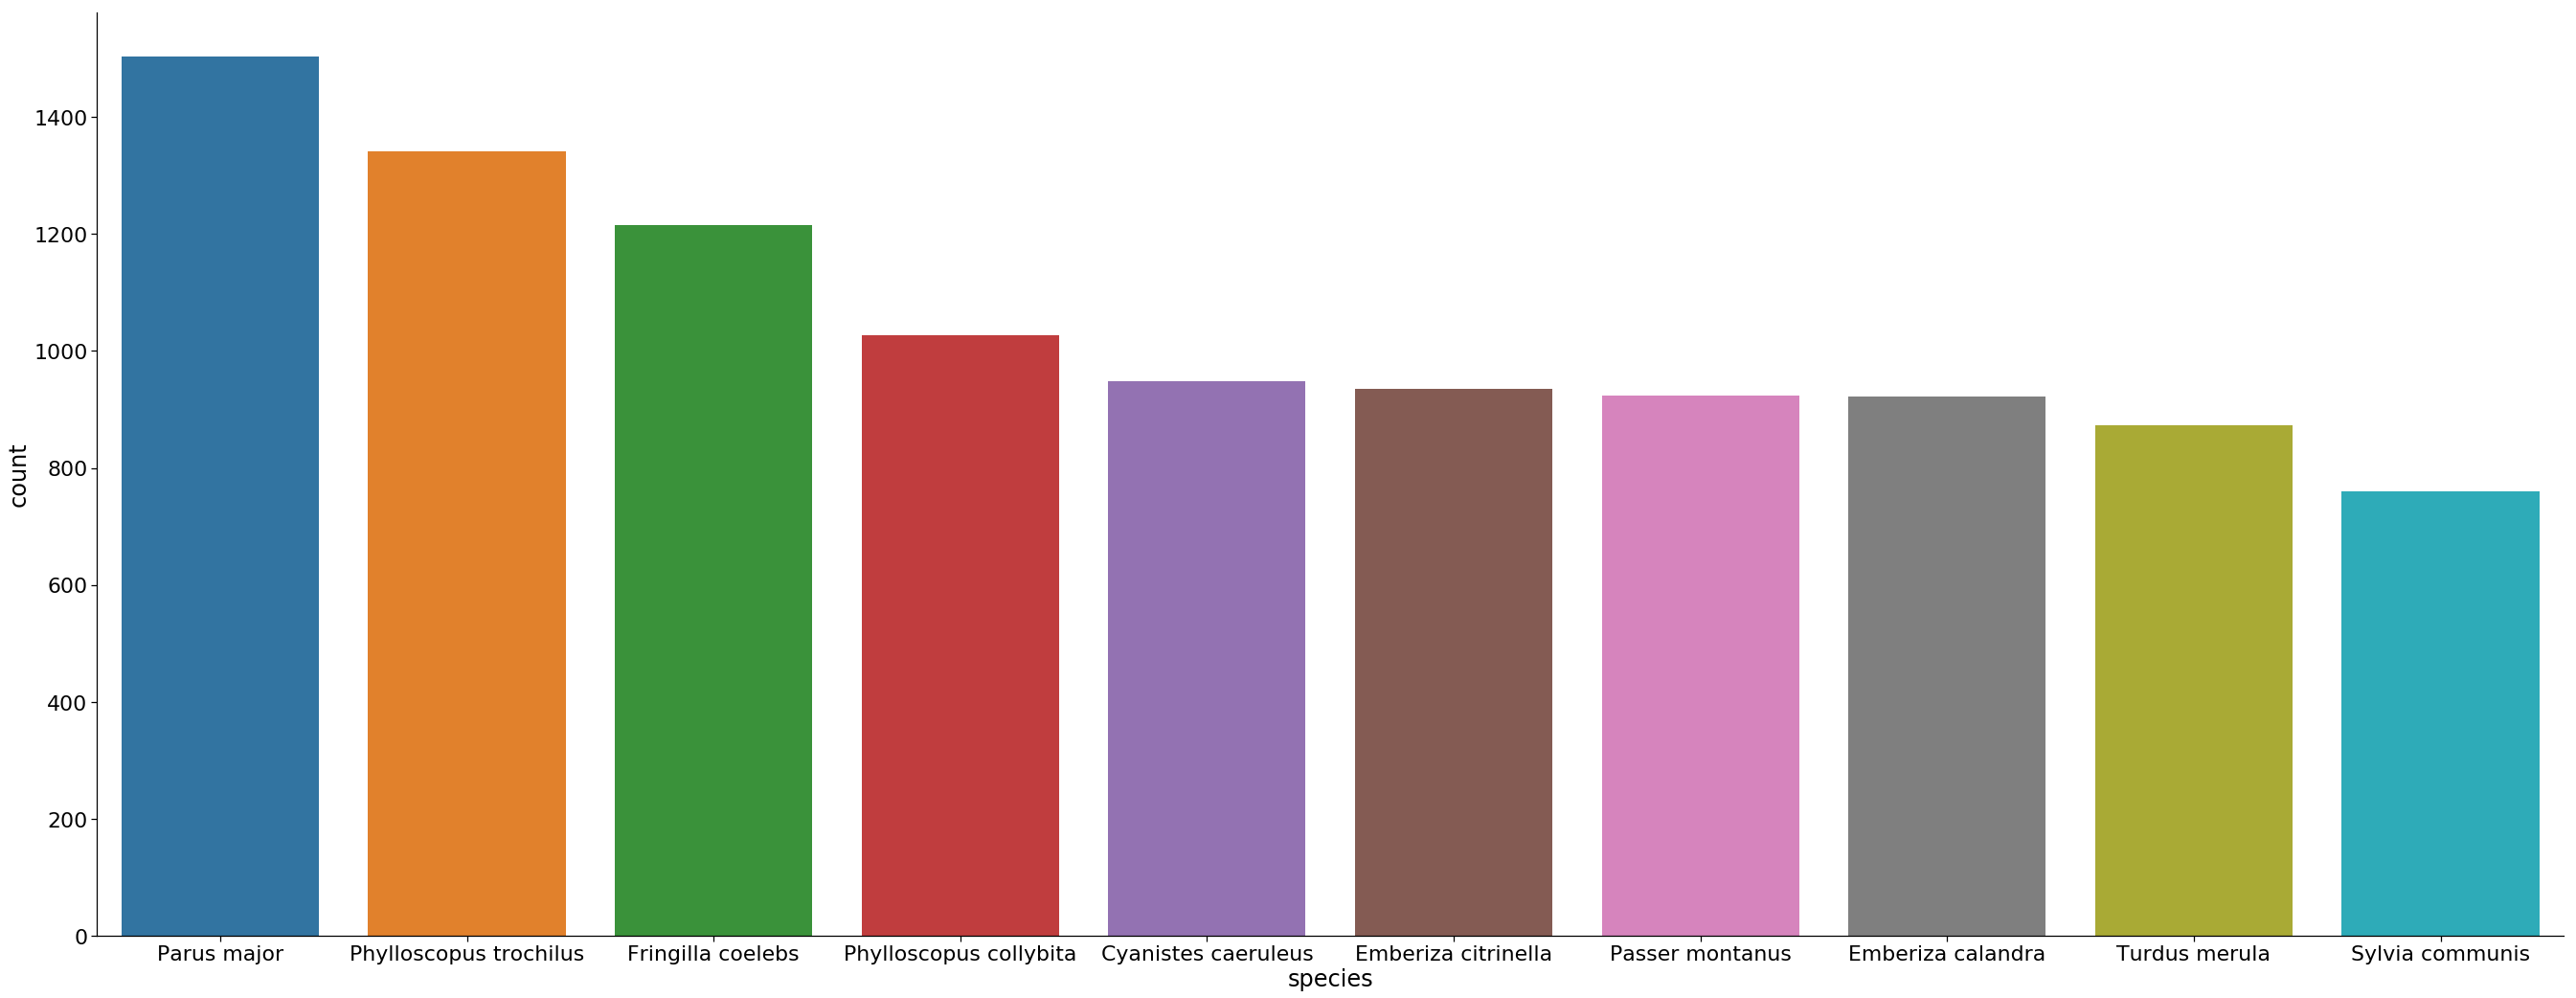

In [37]:
sns.set_context("notebook", font_scale=2)
sns.catplot(x="species", kind="count", data=df, 
            order=df.species.value_counts().iloc[:10].index, height=15, aspect=2.5)

In [42]:
import numpy as np

f, u = pd.factorize(df.species.values)
counts = np.bincount(f)
thres = 30
print(("{0} species recorded more than {2} times, {1} species recorded less than {2} times"
      .format(len(u[counts > thres]), len(u[counts <= thres]), thres)))

182 species recorded more than 30 times, 0 species recorded less than 30 times


In [39]:
indexes = [i for i, x in enumerate(counts) if x > 30]
species = [s for i, s in enumerate(u) if i in indexes]

In [40]:
files_to_remove = df[~df.species.isin(species)].gbifID
for file in files_to_remove:
    path = "../dataset/sound/{}.mp3".format(file)
    if os.path.exists(path):
          os.remove(path)

In [41]:
df = df[df.species.isin(species)] 

In [43]:
df.to_csv('../dataset/xeno_canto_bird_songs_cleaned.tsv', sep='\t', index=False)